<a href="https://colab.research.google.com/github/Abirami-S8/Mosdac-chatbot/blob/main/9_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering using K-Means

Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

Reading dataset

In [3]:
df = pd.read_csv('/content/ganga.csv')
df.head()

,Date,DO,pH,ORP,Cond,Temp,WQI,Status
0,2019-01-12 12:57:07,8.630526,8.879727,0.084822,0.044698,22.650238,20.504530,Fair
1,2019-01-12 12:58:08,8.644233,8.866815,0.086292,0.044651,22.567017,20.359197,Fair
2,2019-01-12 14:54:32,13.501176,12.359906,0.142900,46.195190,18.400787,42.014328,Very Poor
3,2019-01-12 14:55:33,9.458531,12.825684,0.146236,52.609680,18.013641,47.745434,Very Poor
4,2019-01-12 14:56:35,12.409351,12.998978,0.146724,52.399826,18.184570,46.925593,Very Poor


In [5]:
X = df[['Cond', 'DO', 'ORP', 'pH', 'WQI']]
X

,Cond,DO,ORP,pH,WQI
0,0.044698,8.630526,0.084822,8.879727,20.504530
1,0.044651,8.644233,0.086292,8.866815,20.359197
2,46.195190,13.501176,0.142900,12.359906,42.014328
3,52.609680,9.458531,0.146236,12.825684,47.745434
4,52.399826,12.409351,0.146724,12.998978,46.925593
...,...,...,...,...,...
46523,438.403560,8.263043,0.088844,9.104978,23.707966
46524,438.295400,8.263075,0.088952,9.111215,23.756148
46525,438.369870,8.263159,0.089086,9.112804,23.768695
46526,438.411130,8.262602,0.089072,9.146897,24.031746


Finding k using elow method

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[1454890883.2912407,
 348093746.14397395,
 115368080.00432698,
 47231025.82670341,
 31599868.85442687,
 24502749.9449448,
 16140271.801387966,
 12138072.831338089,
 9261261.740321185,
 7136953.438071104]

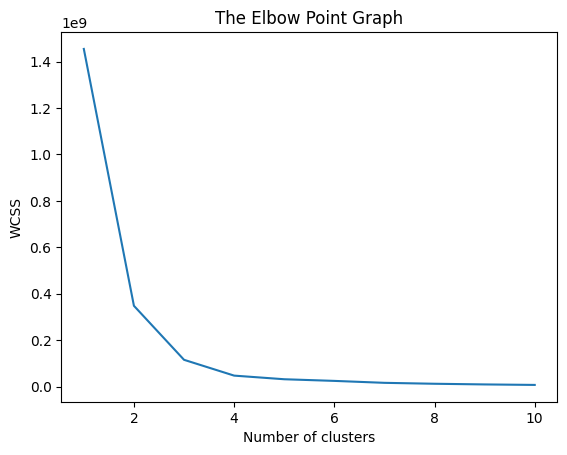

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

So, k = 4.

In [8]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[2 2 2 ... 3 3 3]


In [9]:
df['Cluster'] = y

In [10]:
df.head()

,Date,DO,pH,ORP,Cond,Temp,WQI,Status,Cluster
0,2019-01-12 12:57:07,8.630526,8.879727,0.084822,0.044698,22.650238,20.504530,Fair,2
1,2019-01-12 12:58:08,8.644233,8.866815,0.086292,0.044651,22.567017,20.359197,Fair,2
2,2019-01-12 14:54:32,13.501176,12.359906,0.142900,46.195190,18.400787,42.014328,Very Poor,2
3,2019-01-12 14:55:33,9.458531,12.825684,0.146236,52.609680,18.013641,47.745434,Very Poor,2
4,2019-01-12 14:56:35,12.409351,12.998978,0.146724,52.399826,18.184570,46.925593,Very Poor,2


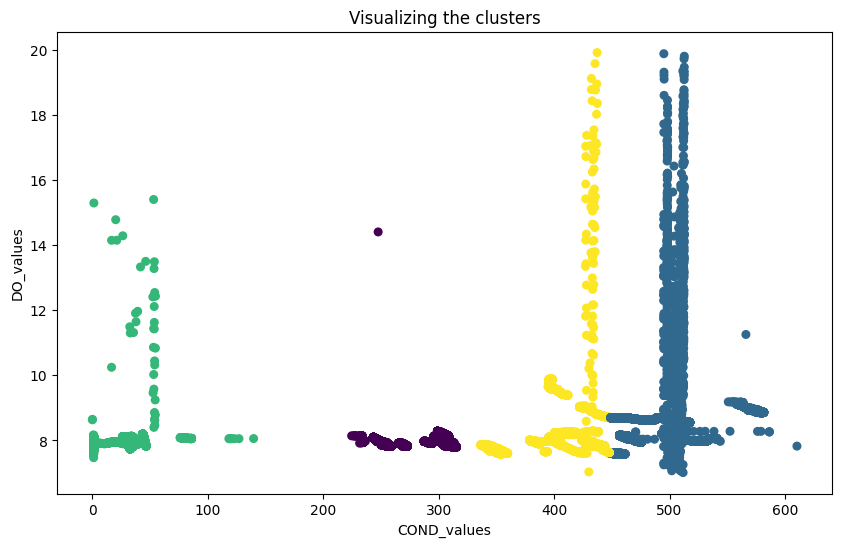

In [11]:
plt.figure(figsize = (10, 6))
plt.scatter(df['Cond'], df['DO'], c = y, s = 30)
plt.xlabel('COND_values')
plt.ylabel('DO_values')
plt.title('Visualizing the clusters')
plt.show()

In [12]:
df.to_csv('Ganga_Classification_data.csv', index = False)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from numpy import interp
from itertools import cycle
%matplotlib inline

In [ ]:
df = pd.read_csv('Ganga_Classification_data.csv')